<a href="https://colab.research.google.com/github/Nayoumi/CNN_process/blob/main/Convolutional_Neural_Network_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

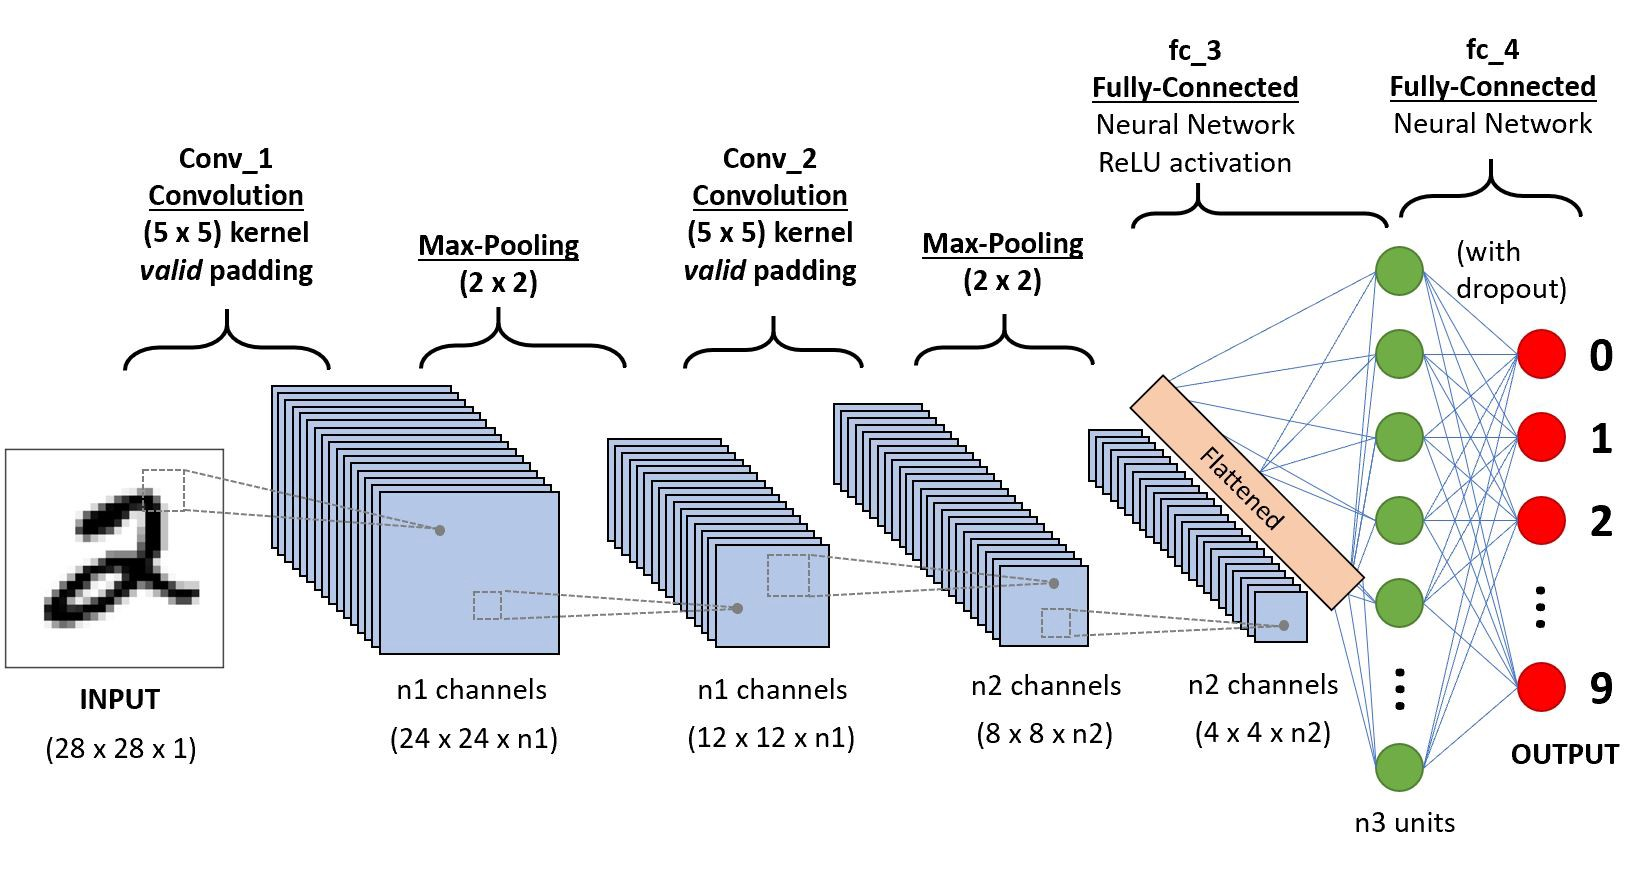

1. kernal(filter)
2. padding
3. strides

These are applied in each layer 

m = ((n+2*p-f)/s)+1

In [ ]:
#formula to claculate the next size of the matrix
print("m = ((n+2*p-f)/s)+1","\n")
n = int(input("Enter the n value: "))
p =int(input("Enter p value: "))
f = int(input("Enter f value: "))
s= int(input("Enter s value: "))
next_step= ((n+2*p-f)/s)+1
print((int(next_step),int(next_step),"n1"))

m = ((n+2*p-f)/s)+1 

Enter the n value: 28
Enter p value: 0
Enter f value: 5
Enter s value: 1
(24, 24, 'n1')


In [ ]:
#find number of paddings to retain the size of an matrix or image
print("p = (s(m+1)-n+f)/2","\n")

n = int(input("Enter the n value: "))
m =int(input("Enter m value: "))
f = int(input("Enter f value: "))
s= int(input("Enter s value: "))
padding = (s*(m-1)+f-n)/2
print("p = ",int(padding))

p = (s(m+1)-n+f)/2 

Enter the n value: 6
Enter m value: 6
Enter f value: 3
Enter s value: 1
p =  1


In [ ]:
# generating a 6 X6 matrix
import numpy as np
image_array = np.array([[3,0,1,2,7,4],[1,5,8,9,3,1],[2,7,2,5,1,3],[0,1,3,1,7,8],[4,2,1,6,2,8],[2,4,5,2,3,9]])

In [ ]:
image_array

array([[3, 0, 1, 2, 7, 4],
       [1, 5, 8, 9, 3, 1],
       [2, 7, 2, 5, 1, 3],
       [0, 1, 3, 1, 7, 8],
       [4, 2, 1, 6, 2, 8],
       [2, 4, 5, 2, 3, 9]])

In [ ]:
3*1+1*1+2*1+0+(-1)+(-8)+(-2)

-5

In [ ]:
# definig a filter to apply in each layer
filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

In [ ]:
filter

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

###Applying padding to retain the size of the matrix

In [ ]:
def pad_with(vector, pad_width, iaxis, kwargs):  
     padding_value = kwargs.get('padder', 0)  
     vector[:pad_width[0]] = padding_value  
     vector[-pad_width[1]:] = padding_value  
image_array=np.pad(image_array, 1, pad_with)  

In [ ]:
image_array

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 1, 2, 7, 4, 0],
       [0, 1, 5, 8, 9, 3, 1, 0],
       [0, 2, 7, 2, 5, 1, 3, 0],
       [0, 0, 1, 3, 1, 7, 8, 0],
       [0, 4, 2, 1, 6, 2, 8, 0],
       [0, 2, 4, 5, 2, 3, 9, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

###Applying convolution to the matrix with the filter

In [ ]:
from scipy.signal import convolve2d
test_out = convolve2d(image_array,filter,mode="valid")
print(-test_out)

[[ -5  -5  -6  -1   6  10]
 [-12  -5  -4   0   8  11]
 [-13 -10  -2   2   3  11]
 [-10   0  -2  -4  -7  10]
 [ -7  -3  -2  -3 -16  12]
 [ -6   0  -2   1  -9   5]]


In [ ]:
test_out=-test_out

In [ ]:
test_out.shape

(6, 6)

###After convolution applying the maxpooling

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import MaxPooling2D,Flatten, Conv2D

In [ ]:
model = Sequential([MaxPooling2D(pool_size=2,strides=1)])
  
# generate pooled output
output = model.predict(test_out.reshape(1,6,6,1))
  
# print output image
output = np.squeeze(output)
print(output)
print(output.shape)

[[-5 -4  0  8 11]
 [-5 -2  2  8 11]
 [ 0  0  2  3 11]
 [ 0  0 -2 -3 12]
 [ 0  0  1  1 12]]
(5, 5)


### After maxpooling flattening the matrix

In [ ]:
output = np.asarray(output)
output = output.flatten()

In [ ]:
print(output)
print(output.shape)

[-5 -4  0  8 11 -5 -2  2  8 11  0  0  2  3 11  0  0 -2 -3 12  0  0  1  1
 12]
(25,)


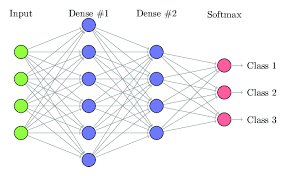

####Fully connected neural network

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(output.shape))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(25))
model.output_shape
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                520       
_________________________________________________________________
dense_17 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_19 (Dense)             (None, 25)                275       
Total params: 1,270
Trainable params: 1,270
Non-trainable params: 0
_________________________________________________________________


### Applying the same steps to the image 

In [ ]:
cat="/content/cat_superres_with_ort.jpg"

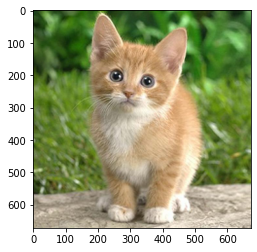

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
  
# reading the image
testImage = plt.imread(cat)
  
# displaying the image
plt.imshow(testImage)

In [ ]:
testImage.shape

(672, 672, 3)

In [ ]:
array = np.array(testImage)

In [ ]:
array.shape

(672, 672, 3)

In [ ]:
from PIL import Image
img = Image.open(cat).convert('L')
img.save('greyscale.png')

In [ ]:
testImage.shape

(672, 672, 3)

### Applying convolution to the cat image 

In [ ]:
from scipy import signal
ascent = Image.open("/content/greyscale.png")
grad = signal.convolve2d(ascent, filter, boundary='symm', mode='valid')
print(grad.shape)

(670, 670)


In [ ]:
def relu(X):
   return np.maximum(0,X)
#Example with mmatrix defined above
grad = relu(grad)

Text(0.5, 1.0, 'Gradient magnitude')

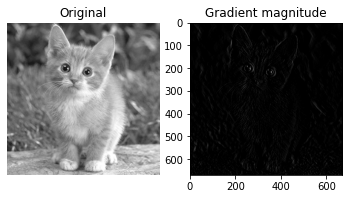

In [ ]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag) = plt.subplots(1,2, figsize=(6, 15))
ax_orig.imshow(ascent, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')

### Applying max pooling to the image

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import MaxPooling2D,Flatten

In [ ]:
grad = grad.reshape(1,670,670,1)

In [ ]:
model = Sequential([MaxPooling2D(pool_size=2,strides=2)])
  
# generate pooled output
output = model.predict(grad)
  
# print output image
output = np.squeeze(output)
print(output.shape)

(335, 335)


### After max pooling relu activation function

In [ ]:
def relu(X):
   return np.maximum(0,X)
#Example with mmatrix defined above
output = relu(output)

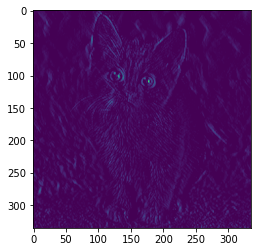

In [ ]:
plt.imshow(output)

In [ ]:
ascent = output
grad = signal.convolve2d(ascent, filter, boundary='symm', mode='valid')
print(ascent.shape)
print(grad.shape)

(335, 335)
(333, 333)


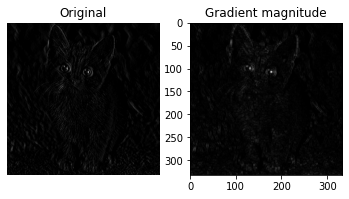

In [ ]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag) = plt.subplots(1,2, figsize=(6, 15))
ax_orig.imshow(ascent, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
fig.show()

### After convolution and conv2d applying flatten to convert 2 D data to 1D data

In [ ]:
from keras.layers import Flatten
grad = np.asarray(grad)
#flatten_output= Flatten(grad)
grad = grad.flatten()


In [ ]:
grad.size

110889

In [ ]:
grad.shape

(110889,)

In [ ]:
print(grad)

[-30 -27 -36 ... -99 -97 -33]


In [ ]:
def sigmoid(X):
   return 1/(1+np.exp(-X))
grad = sigmoid(grad)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [ ]:
grad=grad.reshape(333,333)

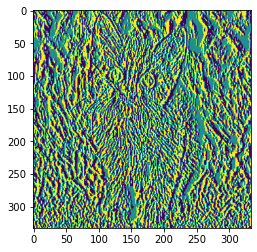

In [ ]:
plt.imshow(grad)

In [ ]:
grad.shape

(333, 333)